# Lead Scoring Case Study

## <strong><span style="color:brown">Step 1: Importing Libraries and Data</span></strong>

### Import Required Libraries ( Suppress warnings, Sklearn libraries, Statmodel libraries, warnings)

In [134]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

from sklearn.linear_model import LinearRegression 



from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

### Environment settings

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

### 1.2 Reading  Data
#### Reading the dataset

In [4]:
df_leads = pd.read_csv("Leads.csv") 

In [5]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df_leads.shape

(9240, 37)

##### <strong><span style="color:blue"></span></strong> The original dataframe comprises 9240 rows and 37 columns.

## <strong><span style="color:blue">Step 2: Data Understanding and Inspection
                                                                                         

#### Reviewing the summary statistics of numerical columns helps grasp the dataset's spread and spot any anomalies or irregularities. This process aids in understanding the distribution, central tendencies, and variability of the data. Identifying unusual values or patterns during this inspection phase can reveal potential data quality issues or interesting insights that warrant further investigation.

In [7]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Analyzing the count of unique values in each column provides insights into data variability and potential data quality issues.

In [8]:
df_leads.nunique() 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Examining column data types and null values offers insights into the dataset's structure and potential data quality concerns.

In [9]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### <strong><span style="color:blue"></span></strong> There are **`null values`** in the dataframe

#### Investigating the frequency of missing values in each column sheds light on data completeness and highlights potential gaps in the dataset.

In [10]:
df_leads.isnull().sum () 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### <strong><span style="color: blue"></span></strong> Some columns display a notable quantity of missing or null values within the dataframe. We'll need to determine our approach to handling them during the data cleaning or imputation phase.


#### Check for duplicate rows

In [11]:
print(df_leads.duplicated().sum())

0


##### <strong><span style="color:blue"></span></strong> There are no duplicates in the dataframe df_leads.


## <strong><span style="color:brown">Step 3: Data Cleaning</span></strong>

### 3.1 Treatment for 'Select' values

**As outlined in the Problem Statement, numerous categorical variables contain a category labeled **`'Select'`**. This category requires attention as it essentially functions as a null value. One potential reason for this occurrence could be that the customer opted not to choose any option from the provided list, resulting in the default value of 'Select' for those columns.**

#### List of columns having 'Select' as value

In [12]:
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


##### Converting 'Select' values to NaN.

In [13]:
df_leads = df_leads.replace('Select', np.nan)

#### Checking if all 'Select' values have been handled in the columns

In [14]:
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


#### <strong><span style="color:blue"></span></strong> Now, there are no `'Select'` values in the dataframe df_leads. 

### 3.2 Handling Missing Values

#### Calculating Missing Values Percentage

In [15]:
100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### 3.2.1 Remove columns from the dataframe where the proportion of null values exceeds 40%.

#### Create a custom function to eliminate columns from the dataset and determine the shape before and after the removal process.

In [16]:
def dropNullColumns(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

#### Utilize a user-defined function to eliminate columns from the dataset.

In [17]:
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


#### Verifying the null value percentage for the remaining columns in the dataset.

In [18]:
100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 3.2.2 Columns with Categorical Data

#### Choose the columns containing non-numeric data types from the dataset.

In [19]:
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols) 

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


### <strong><span style="color:blue"></span></strong> Our strategy involves examining the count of values in each categorical column to determine the appropriate treatment for missing values in that specific column.

In [20]:
columnsList = ["City", "Specialization", "Tags", 'What matters most to you in choosing a course',
              'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

for col in columnsList:
    percentage = 100 * df_leads[col].value_counts(normalize=True)
    print("Value counts percentage for column:", col, "\n")
    print(percentage, "\n")
    print("___" * 40, "\n") 


Value counts percentage for column: City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

Value counts percentage for column: Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
Internatio

#### Insights:
- <strong><span style="color:maroon">City:</span></strong> The City column exhibits 39.71% missing values. Filling in missing data with 'Mumbai' could significantly skew the dataset, leading to potential model bias. Hence, it's advisable to `drop the City column`. 

- <strong><span style="color:blue">Specialization:</span></strong> With 36.58% missing values, the Specialization column demonstrates an even distribution of selections. In this scenario, creating an additional category labeled `'Others'` is more appropriate than imputation or dropping.

- <strong><span style="color:maroon">Tags:</span></strong> Tags indicate the current status of leads and contain 36.29% missing values. Since this information may not be useful for modeling, it's `recommended to drop the Tags column`.

- <strong><span style="color:maroon">What matters most to you in choosing a course:</span></strong> This variable, with 29.32% missing values, sees 'better career prospects' selected by 99.95% of customers, indicating significant skewness. Thus, it's unlikely to `provide meaningful insights`.

- <strong><span style="color:blue">What is your current occupation:</span></strong> Imputing missing values with 'Unemployed', the most prevalent occupation, seems appropriate given X Education's context of selling online courses.

- <strong><span style="color:maroon">Country:</span></strong> Around 96% of customers are from India, making it impractical to impute missing values with 'India'. Hence, `dropping the Country column` is recommended.

- <strong><span style="color:blue">Last Activity:</span></strong> "Email Opened" is the most frequent activity, and only 1.11% of values are missing. Hence, imputing missing values with 'Email Opened' is a reasonable strategy.

- <strong><span style="color:blue">Lead Source:</span></strong> "Google" is the most common source, and only 0.39% of values are missing. Therefore, imputing missing values with 'Google' is a logica l'Google' is a reasonable strategy.


<strong><span style="color:purple">🧹Dropping the following columns:</span></strong> 
- 'City': The City column contains 39.71% missing values, and imputing them with 'Mumbai' could skew the data. Hence, it's prudent to `drop the City column`.
- 'Tags': With 36.29% missing values and its limited utility for modeling, it's recommended to `drop the Tags column`.
- 'Country': Considering approximately 96% of customers are from India, imputing missing values with 'India' doesn't make business sense. Hence, `dropping the Country column` is advised.
- 'What matters most to you in choosing a course': This column has 29.32% missing values and lacks meaningful insights due to significant skewness. Therefore, it's suitable to `drop this column`.


In [21]:
print("Before Drop:", df_leads.shape)
df_leads.drop(['City', 'Tags', 'Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)
print("After Drop:", df_leads.shape)

Before Drop: (9240, 30)
After Drop: (9240, 26)


<strong><span style="color:Red">🪄Imputing the following columns</span></strong> 
- 'Specialization',
- 'Lead Source',
- 'Last Activity', 
- 'What is your current occupation'

#### To extrapolate from the aforementioned insights, we'll proceed by imputing values that align with the established patterns and trends.

In [22]:
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

### To double-check, let's calculate the percentage of null values for the remaining columns

In [23]:
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### 3.2.3 Columns with Numerical Data

#### TotalVisits

In [25]:
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

#### <strong><span style="color:purple">NOTE:</span></strong> Missing values in 'TotalVisits' can be imputed with `mode`.

#### Impute missing values in the "TotalVisits" column with the mode, or in other words, the most frequent value.

In [28]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [30]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

<strong><span style="color:blue">NOTE:</span></strong> Missing values in 'Page Views Per Visit' can be imputed with `mode`.

#### Impute missing values in the "Page Views Per Visit" column with the mode, or in other words, the most frequent value.

In [32]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

<strong><span style="color:black">Re-checking the null values for columns </span></strong>


#### After handling both categorical and numerical columns, let's recheck the percentage of null values, in other words, reassess the proportion of missing values in the dataset.

In [33]:
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3 Removing Unwanted Columns 

In [34]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

#### 3.3.1 Addressing columns with only one unique value means dealing with features that don't offer any variability or information gain.


##### Identify columns where the count and frequency of unique values are the same, indicating that each value occurs only once.

In [35]:
df_leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


<strong><span style="color:blue">NOTE:</span></strong> The following columns have only **`one unique value`**:
- 'I agree to pay the amount through cheque'
- 'Get updates on DM Content'
- 'Update me on Supply Chain Content'
- 'Receive More Updates About Our Courses'
- 'Magazine'

These columns provide <u>_no variability_</u> as they elicit <u>_only one category of response_</u> from customers. Hence, they can be safely <strong><span style="color:red">dropped</span></s



#### We'll generate a list of columns where the count and frequency of unique values are the same, indicating they have only one unique value. These columns can be dropped.ong>.



In [36]:
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


#### 3.3.2 We're removing columns that offer no value for modeling purposes.

<strong><span style="color:blue">NOTE:</span></strong> We're dropping columns like:
 
- 'Prospect ID'
- 'Lead Number'
- 'Last Notable Activit**y'

These columns don't contribute to the model's predictive power and removing them will streamline the data**frame.

In [37]:
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


#### Calculate the percentage of missing values in each row, then sort the rows in descending order based on this percentage.

In [38]:
100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

<strong><span style="color:blue">NOTE:</span></strong> No missing values in rows

### 3.4 Checking & Dropping Category Columns that are Skewed
- <strong><span style="color:blue">NOTE:</span></strong> This process mirrors the approach used for handling unique values in numeric columns.

#### 3.4.1 We're examining skewness in categorical columns.

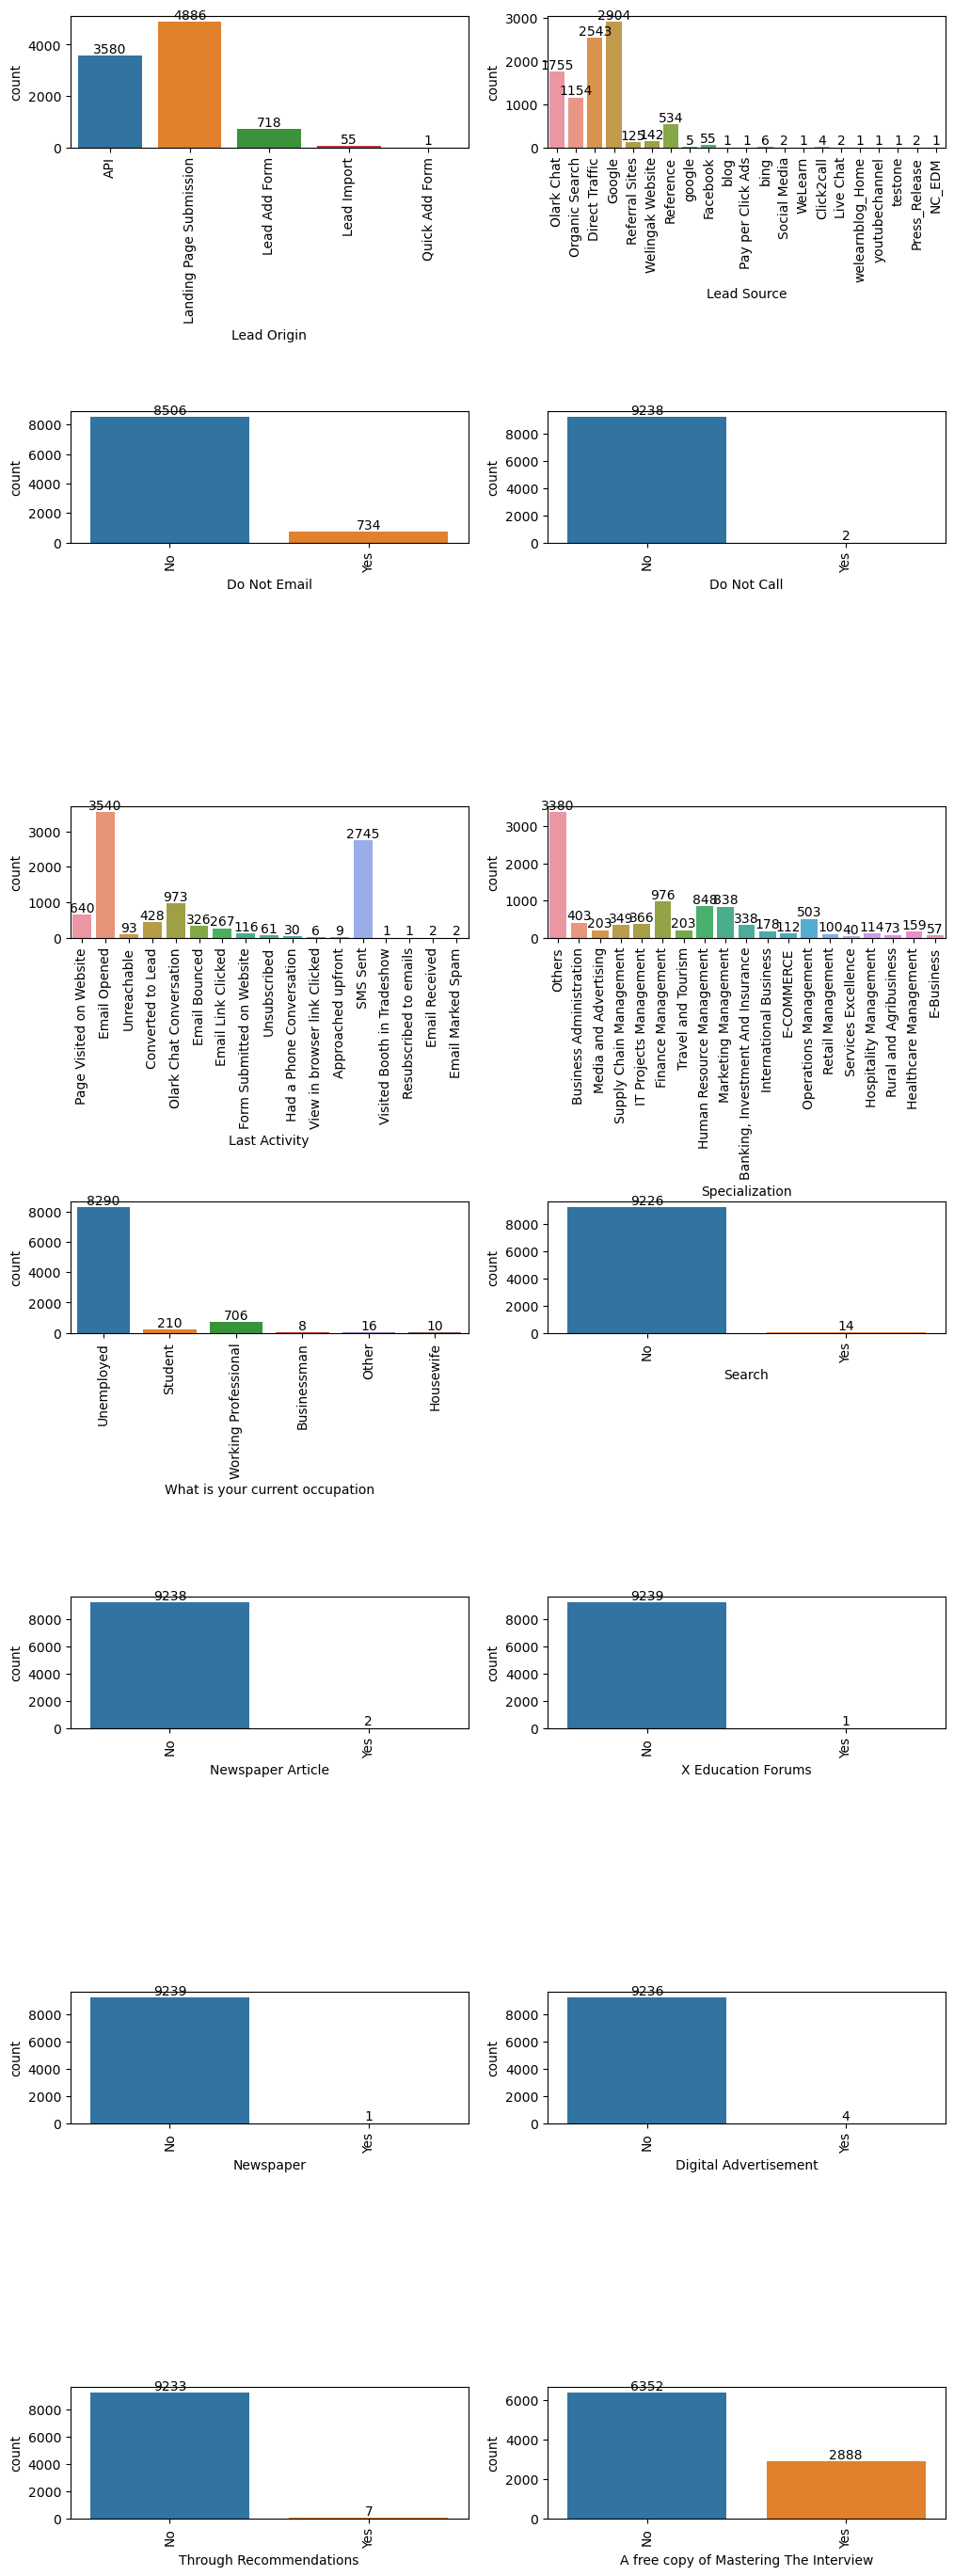

In [39]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

<strong><span style="color:blue">NOTE:</span></strong> The following columns have highly skewed data:
- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'

Therefore, these columns will be dropped as they won't contribute to the model. Additionally, skewed variables can adversely affect logistic regression models by potentially leading to biased or inaccurate parameter e


#### We're removing categorical columns with highly skewed data as they won't contribute meaningfully to the model.stimates.

In [40]:
print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [41]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### 🎯Data is clean from missing values
After cleaning the data, let's proceed with standardizing the values.

### 3.5 Let's conduct an analysis of outliers in the dataset.

#### We'll perform outlier analysis specifically for numerical columns in the dataset.

In [42]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

#### We'll check for outliers in numerical variables other than the target variable, which are specified in the list `num_cols`. Then, we can use a user-defined function (UDF) called `Check_Outliers` to perform this analysis on the DataFrame `df_leads`.

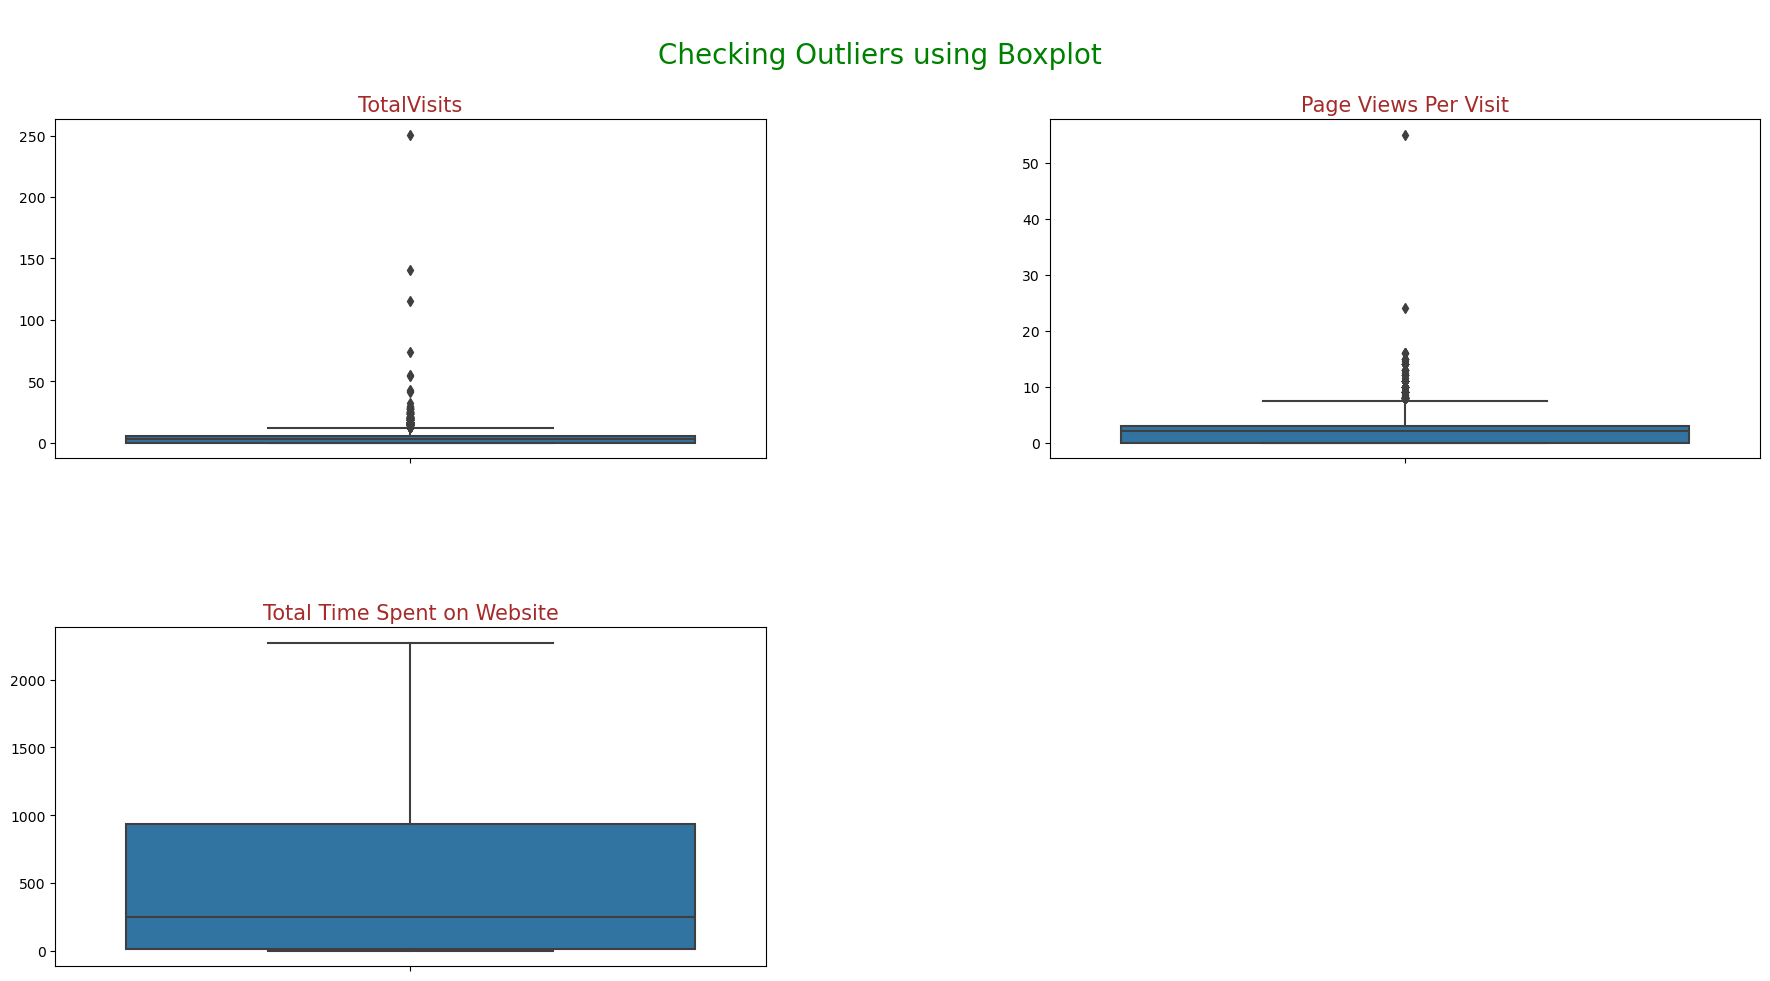

In [43]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols) 

The variables "TotalVisits" and "Page Views Per Visit" exhibit outliers, evident from the boxplot. Hence, it's necessary to treat these outliers for these variables.

#### Capping Outliers for the treatment

##### Before addressing outliers, let's examine the distribution of the variables "TotalVisits" and "Page Views Per Visit".

In [44]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


#### Creating a user-defined function (UDF) to treat outliers through capping and flooring.

In [46]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i]) 

#### Creating a custom function to check for outliers in numerical variables other than the target variable.

In [47]:
capping_cols = ["TotalVisits","Page Views Per Visit"]

Outlier_treatment(df_leads,capping_cols) 

#### Inspecting boxplots after outlier treatment and creating a user-defined function (UDF) to generate boxplots.

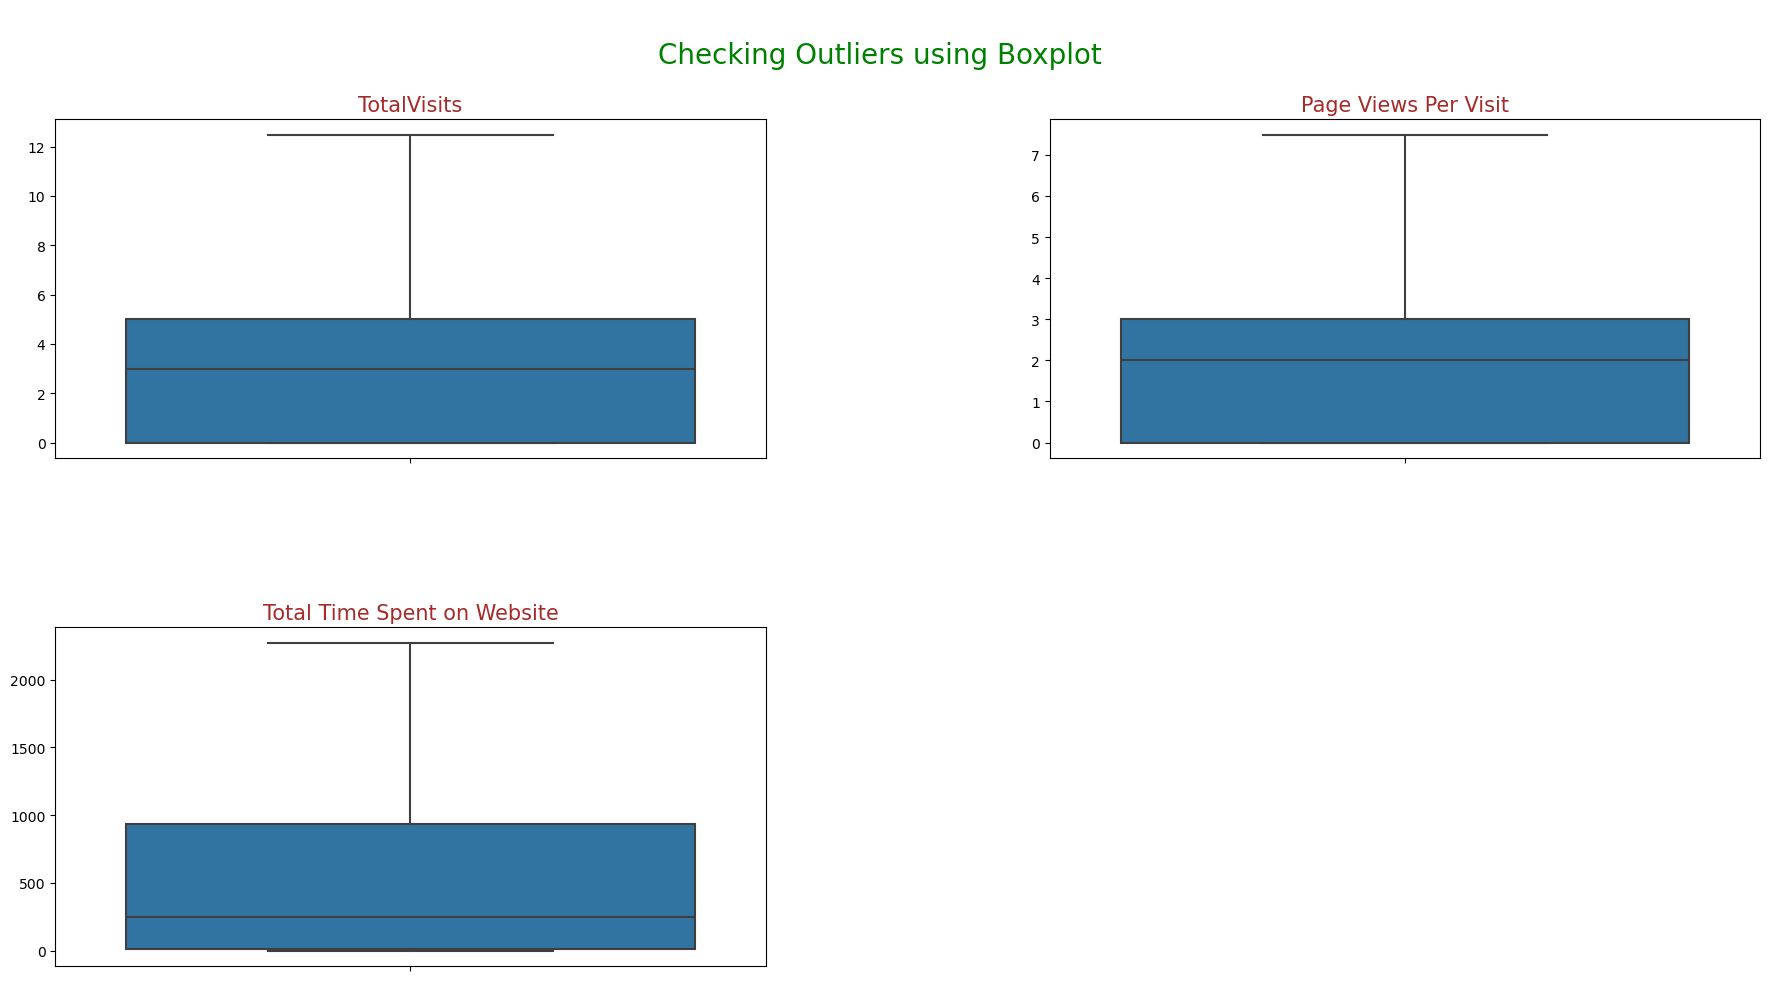

In [48]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

Check_Outliers(df_leads,num_cols)

#### After treating outliers, let's examine detailed percentile values for the numerical variables.

In [49]:
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### 3.6 Fixing Invalid values & Standardising Data in columns#### 
We'll ensure that entries in the data are in the correct format, including checking casing styles (UPPER, lower), and validingte the data types of columns.

In [50]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### We'll focus on checking and standardizing categorical variables.

In [51]:
columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

<strong><span style="color:blue">NOTE:</span></strong> 

- We've observed that certain categories/levels in the "Lead Score" and "Last Activity" columns have minimal records. To avoid creating numerous unnecessary columns when generating dummy variables, we propose aggregating these categories into a single group labeled "Others." This approach will maintain organization and clarity.

- Additionally, we've identified that "Google" and "google" are essentially the same in the "Lead Source" column. Hence, we'll standardize the case to ensure consistency.

#### 3.6.1 Grouping Low frequency values 
#### We're consolidating low-frequency values into a group labeled "Others." Additionally, we'll standardize the case for "Google" to ensure consistency.

In [52]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

#### We'll compute the percentage of occurrences for each value after performing replacements.

In [53]:
df_leads["Lead Source"].value_counts(normalize=True)*100 

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

#### We'll consolidate levels with low frequencies into a single category labeled "Others".

In [54]:
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

#### After performing replacements, we'll compute the percentage of occurrences for each value.

In [55]:
df_leads['Last Activity'].value_counts(normalize=True)*100 

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

#### We're renaming the column "A free copy of Mastering The Interview" to "Free_copy" and "What is your current occupationA free copy of Mastering The Interview" to "Current_occupation".

In [56]:
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

<strong><span style="color:blue">NOTE:</span></strong> 
- Since both "Do Not Email" and "Free_copy" are binary categorical columns, we'll map both of them from "Yes/No" to "1/0".

#### 3.6.2 We're mapping binary categorical variables from "Yes/No" to "1/0".

In [57]:
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### 3.6.3 Let's review the data types of the variables.

In [58]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


<strong><span style="color:blue">NOTE:</span></strong> The data types seem appropriate, and no adjustments are required.

## <strong><span style="color:brown">Step 4: Data Analysis (EDA)</span></strong>

#### 4.1 We're conducting Exploratory Data Analysis (EDA) to determine if the data is imbalanced. Data imbalance occurs when one value dominates while others are in the minority, resulting in an uneven distribution of observations in the dataset. In our context, we're specifically assessing imbalance in the target variable 'Converted', where 1 indicates conversion and 0 indicates non-conversion.

#### Let's plot the results on a bar plot with a formatted title and labeled axes. Additionally, we'll adjust the ticks on the y-axis and modify the x-ticks for clarity.

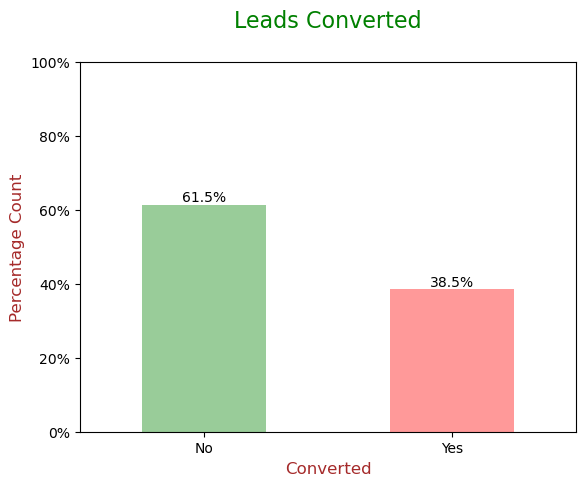

In [59]:
ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})

plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)


plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<strong><span style="color:purple">Insights:</span></strong> 

The conversion rate is 38.5%, indicating that only 38.5% of the individuals have converted to leads, which represents the minority.
Conversely, the majority, comprising 61.5% of the individuals, did not convert to leads

**Ratio of Data Imbalance**




In [60]:
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

In [61]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### 4.2.1 We'll conduct univariate analysis specifically for categorical variables.

#### List of categorical columns

#### counterplot of columns with its value_counts percentage as annotation

In [66]:
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"] 

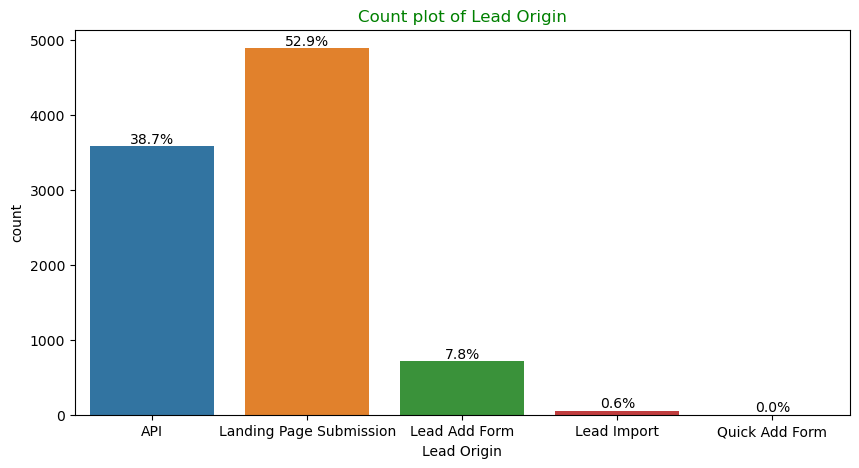

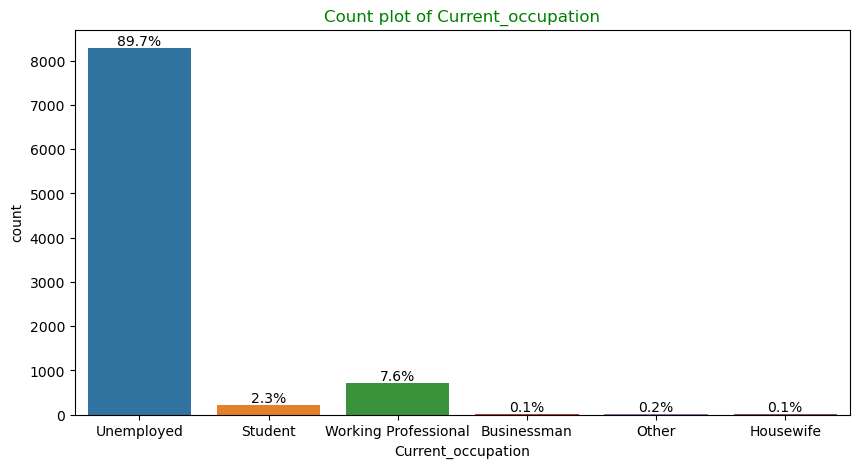

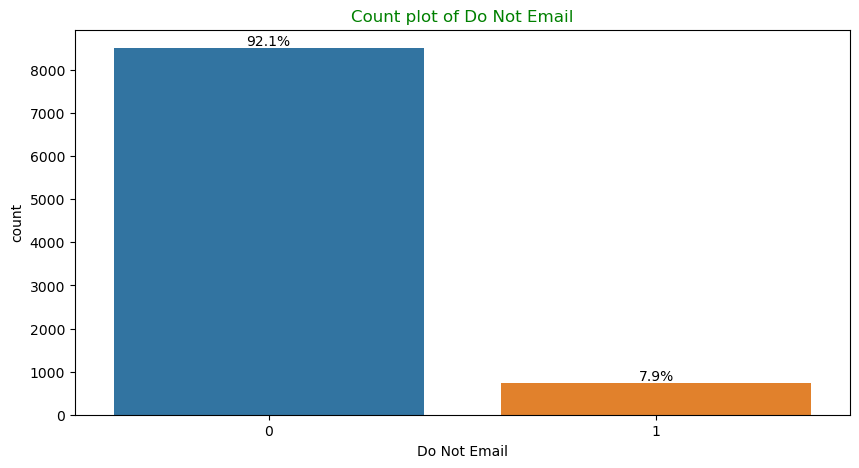

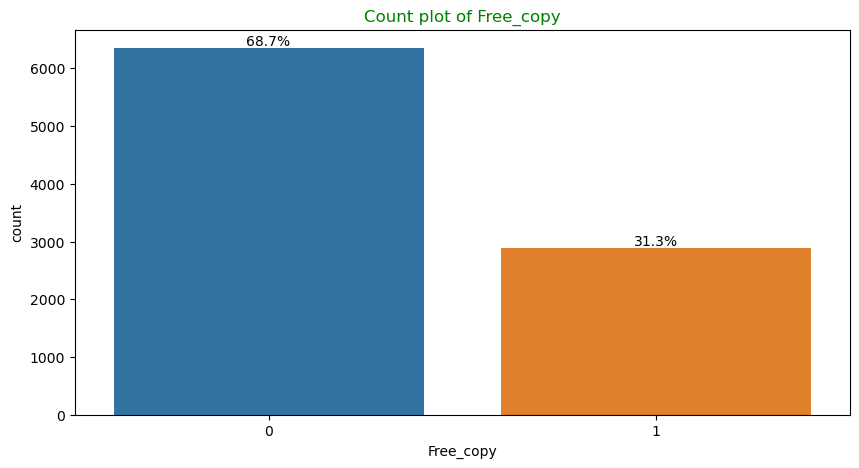

In [68]:
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points') 

#### Let's create bar plots for the remaining columns from the categorical variables. To ensure clarity, we'll rotate the x-axis labels by 90 degrees.

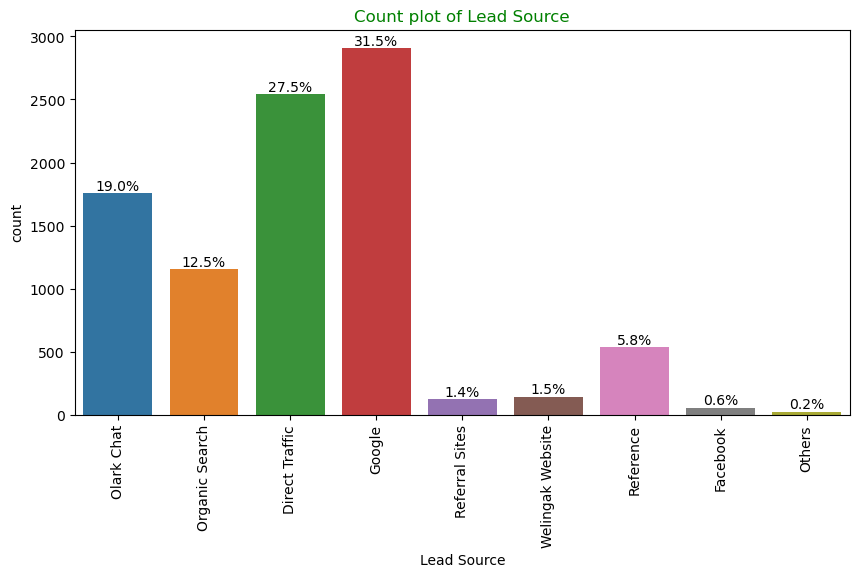

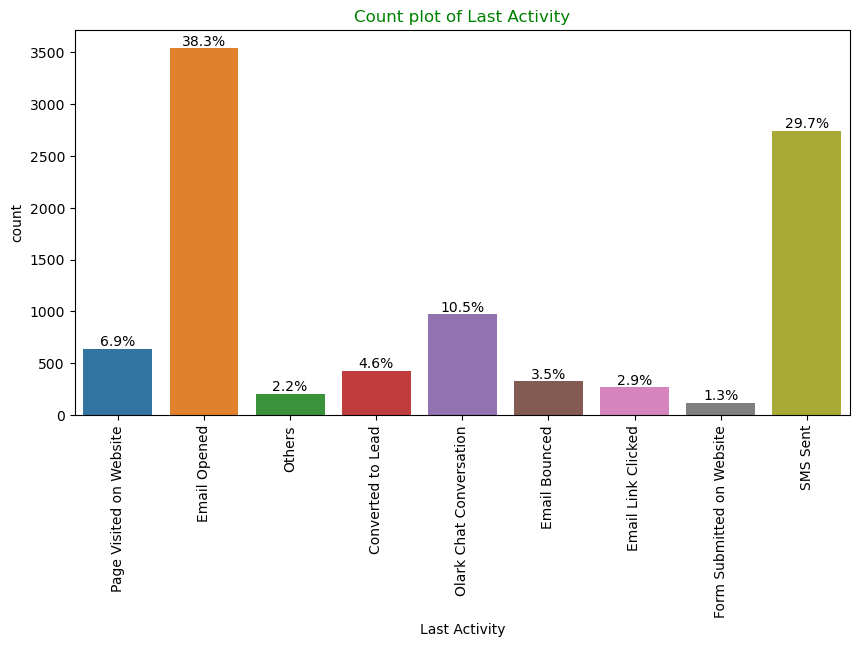

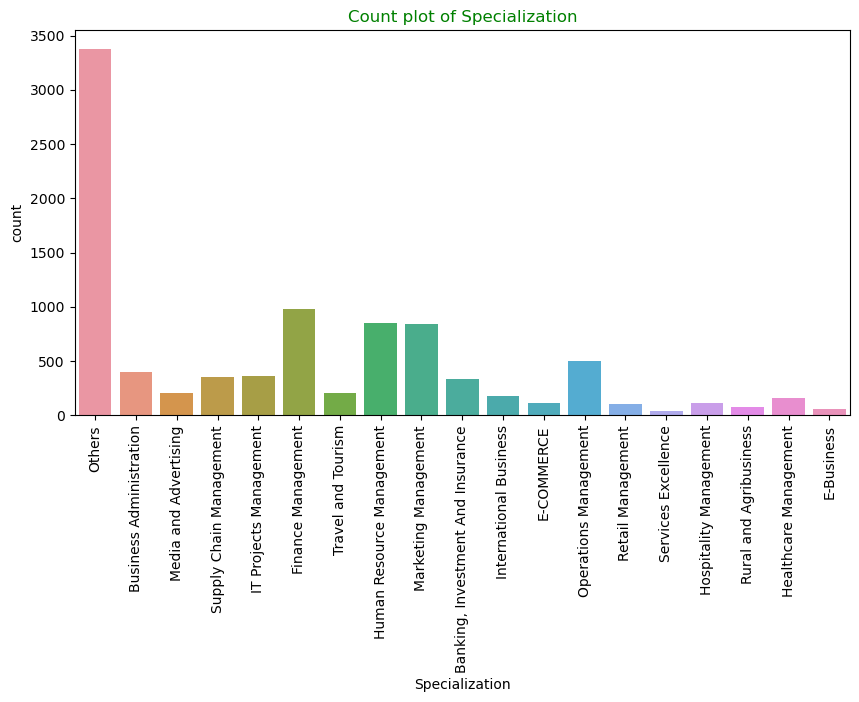

In [69]:
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

<strong><span style="color:purple">Observations:</span></strong> 

- During the Categorical Univariate Analysis, we've assessed the percentage distribution of values in each column. This provides insights into which variables can be utilized in **Bivariate analysis**.

<hr/>
<strong><span style="color:purple">Insights Univariate:</span></strong>  

**Here's a breakdown of features from variables predominantly present (both Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" accounts for 53% of customers, while "API" accounts for 39%.

- **Current_occupation:** Approximately 90% of customers are categorized as Unemployed.

- **Do Not Email:** Around 92% of people have opted out of receiving emails about the course.

- **Lead Source:** Combined, Google and Direct Traffic represent 58% of the lead sources.

- **Last Activity:** The majority, constituting 68% of customers, are engaged in activities such as SMS Sent and Email Opened.

<strong><span style="color:blue">NOTE:</span></strong> These insights will prove valuable in subsequent Bivariate Analysis.

### 4.3 Bivariate Analysis
Bivariate analysis involves examining the relationship between two variables.

#### 4.3.1 Bivariate Analysis for Categorical Variables


##### The user-defined function (UDF) "Bivariate_cat" compares the actual distribution (value count percentage) from the data, while the second graph illustrates the Lead Conversion Rate as a percentage, indicating how many leads are converted from the distribution shown in the first plot.

In [82]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


### We'll conduct Bivariate Analysis for all these variables using a loop and a user-defined function (UDF). This analysis involves comparing variables with respect to the 'Converted' (target) variable, with one categorical column as 'hue'.

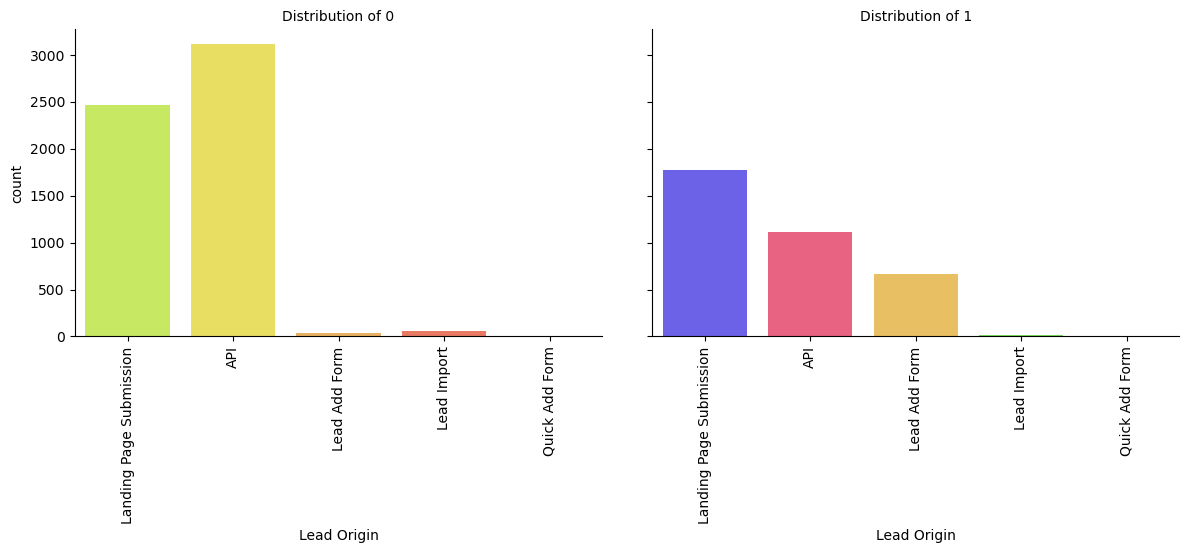

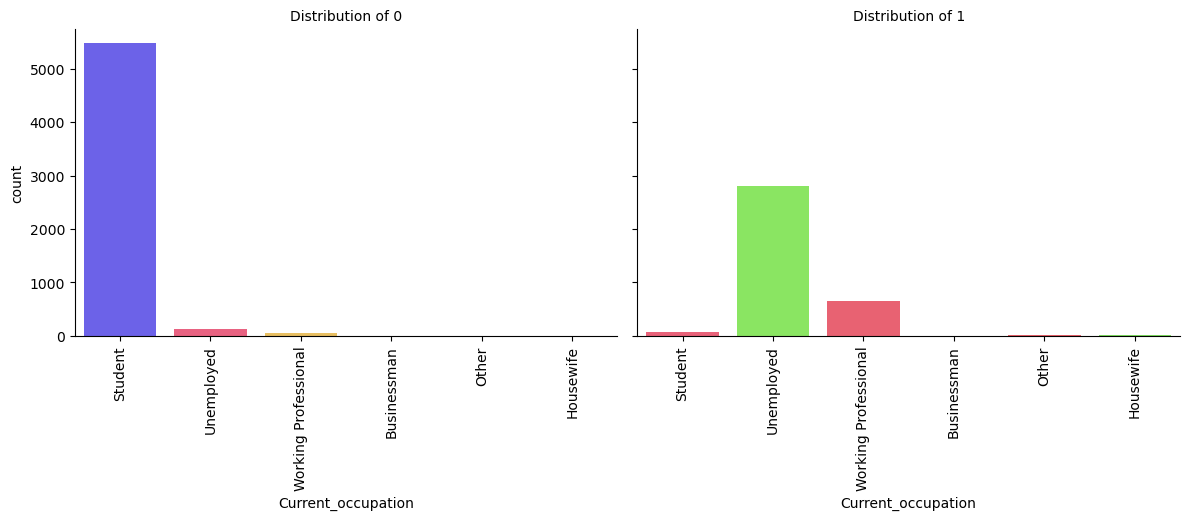

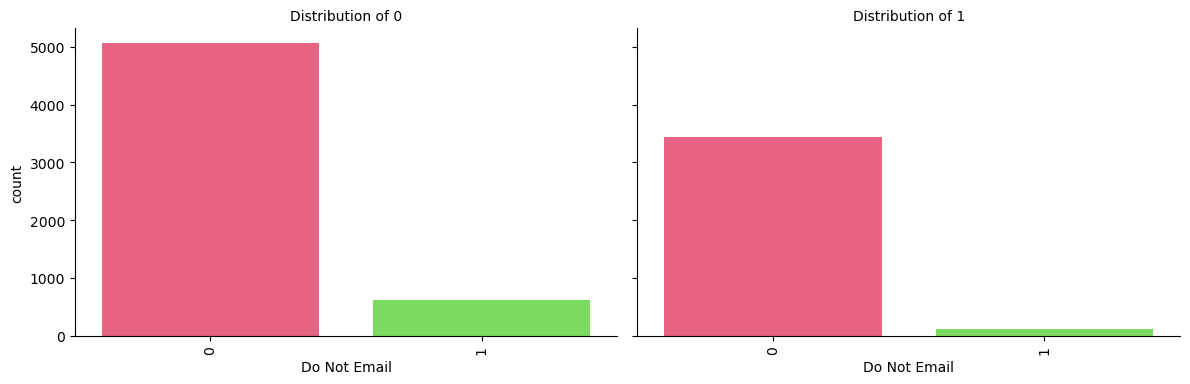

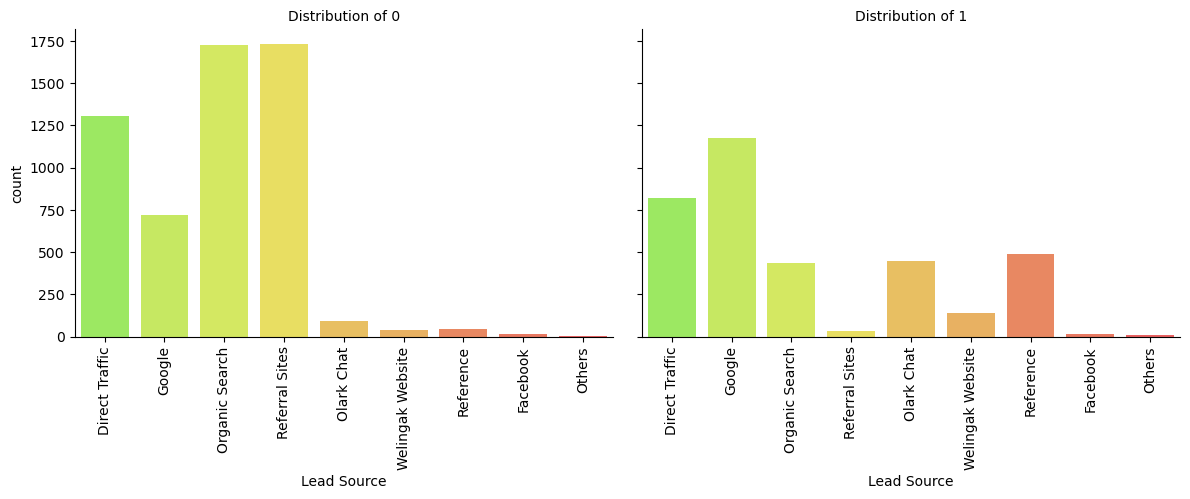

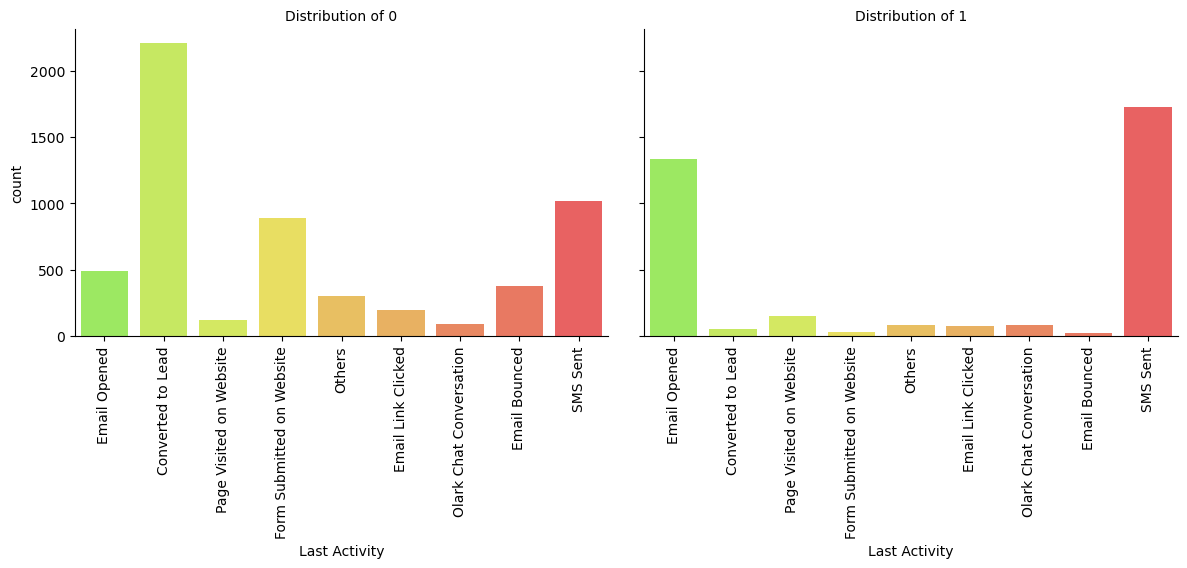

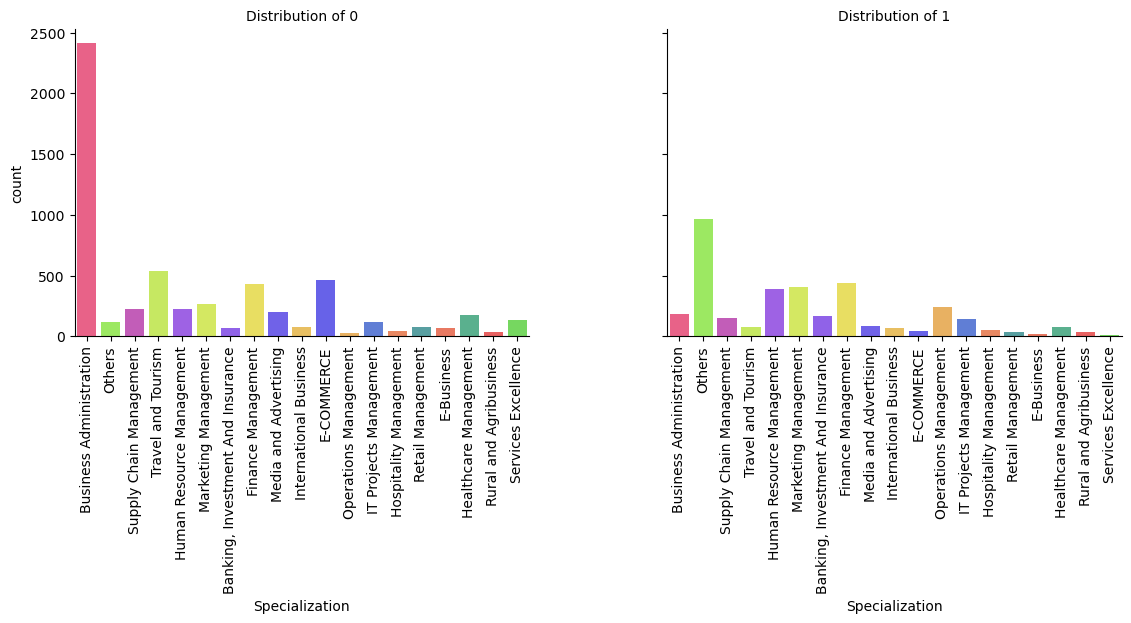

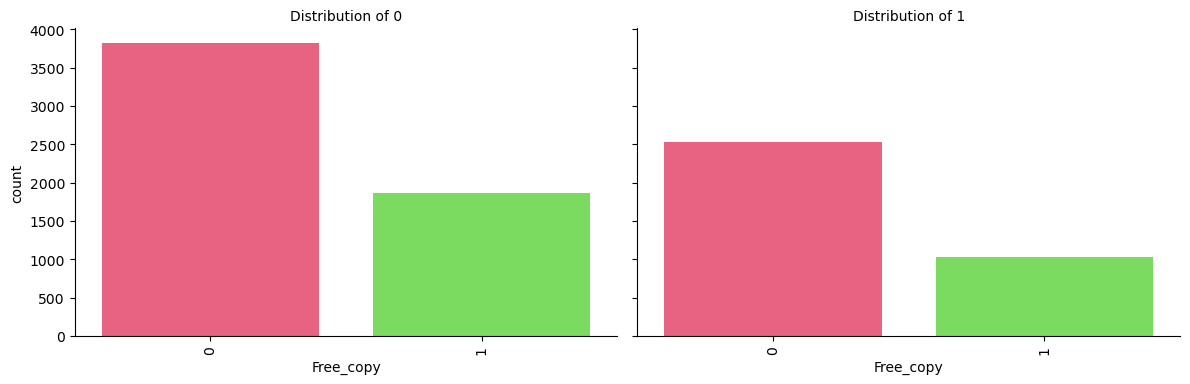

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

def Bivariate_cat(df, variable_name):
    g = sns.FacetGrid(df, col="Converted", height=4, aspect=1.5)
    g.map(sns.countplot, variable_name, palette="prism_r", alpha=0.7)
    g.set_titles("Distribution of {col_name}")
    g.set_xticklabels(rotation=90)
    plt.show()

# Usage
cat_cols = ["Lead Origin", "Current_occupation", "Do Not Email", "Lead Source", "Last Activity", "Specialization", "Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads, variable_name=i)


<strong><span style="color:purple">Insights:</span></strong> 

- <strong><span style="color:Green">Lead Origin:</span></strong> Approximately 52% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%. The "API" identified approximately 39% of customers with a lead conversion rate (LCR) of 31%.

- <strong><span style="color:Green">Current_occupation:</span></strong> About 90% of the customers are categorized as Unemployed, with a lead conversion rate (LCR) of 34%. Conversely, Working Professionals constitute only 7.6% of total customers, with an impressive lead conversion rate (LCR) of almost 92%.

- <strong><span style="color:Green">Do Not Email:</span></strong> 92% of the people have opted not to be emailed about the course.

<strong><span style="color:Blue">Note:</span></strong> We have assumed LCR as Lead Conversion Rate.

<hr/>

- <strong><span style="color:Green">Lead Source:</span></strong> Google has an LCR of 40% out of 31% of customers, while Direct Traffic contributes a 32% LCR with 27% of customers, which is lower than Google. Organic Search also yields a 37.8% LCR, but only 12.5% of customers come through this Lead Source. Reference has an LCR of 91%, but there are only around 6% of customers through this Lead Source.

- <strong><span style="color:Green">Last Activity:</span></strong> "SMS Sent" boasts a high lead conversion rate of 63%, with 30% contribution from last activities. "Email Opened" activity contributed 38% of last activities performed by the customers, with a 37% lead conversion rate.

- <strong><span style="color:Green">Specialization:</span></strong> Marketing Management, HR Management, and Finance Management show significant contribution.

#### 4.3.2 We'll conduct Bivariate Analysis for numerical variables.

<Figure size 2000x800 with 0 Axes>

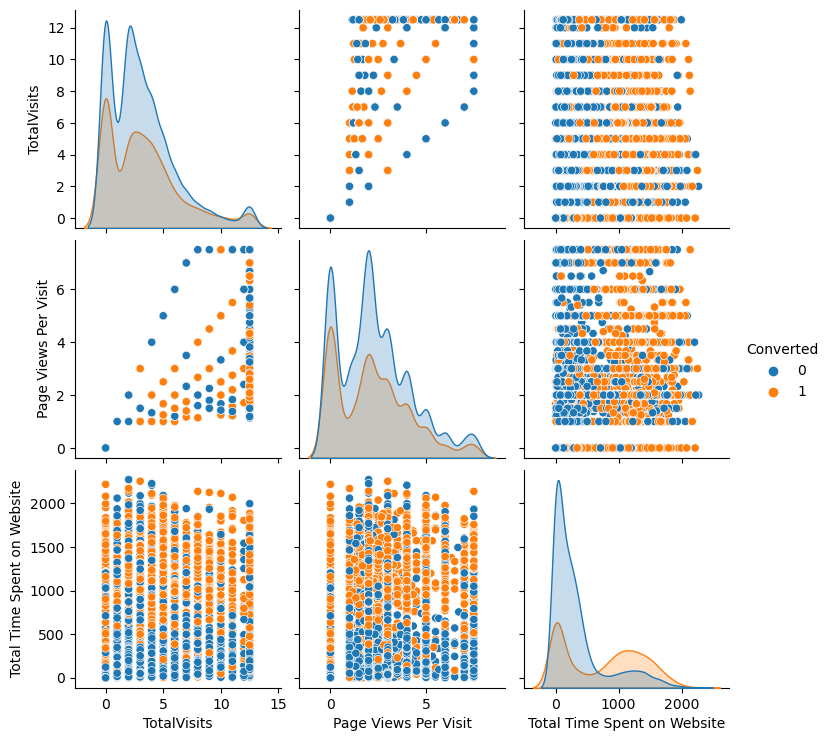

In [86]:
plt.figure(figsize=(20, 8))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show() 

In [87]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'] 

#### This snippet generates a heatmap to visualize the correlation between numerical variables in the dataset.

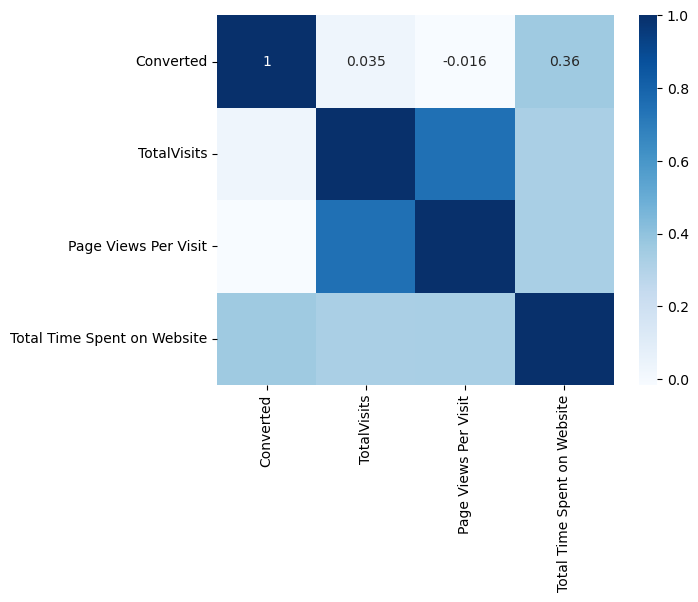

In [92]:
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show() 

#### Boxplot with Converted as hue 

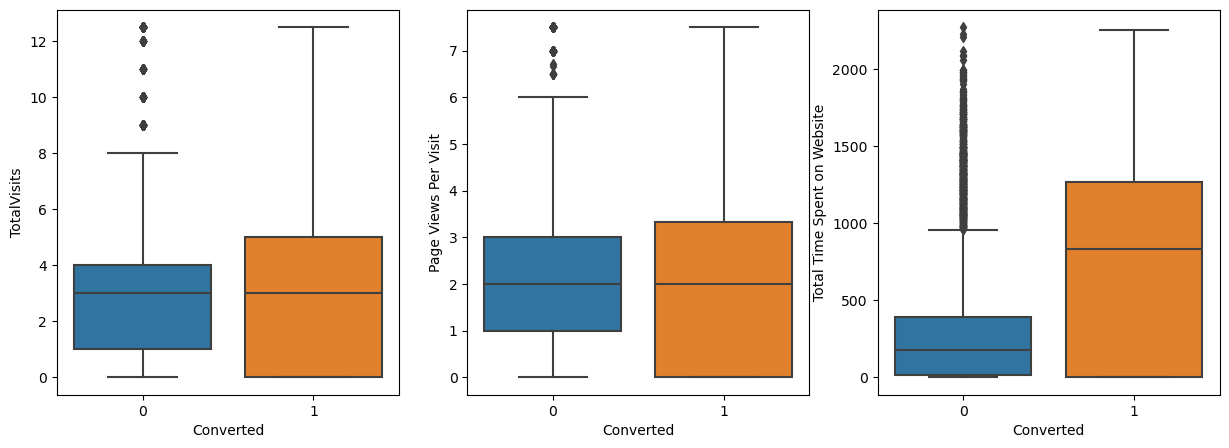

In [93]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show() 

<strong><span style="color:purple">Insights:</span></strong> 
In the boxplot, it's evident that past leads who spend more time on the website are more likely to be successfully converted compared to those who spend less time.

## <strong><span style="color:brown">Step 5: Data Preparation</span></strong>

### 5.1 Dummy Variables
For categorical variables with multiple levels, let's create dummy features using one-hot encoding.

#### Binary-level categorical columns have already been mapped to 1/0 in previous steps, we'll start directly with creating dummy variables for categorical variables with multiple levels.

In [94]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### We'll create dummy variables for some of the categorical variables, dropping the first one to avoid multicollinearity. Then, we'll add the results to the master dataframe.

In [95]:
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)
df_leads = pd.concat([df_leads, dummy], axis=1)

In [96]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


#### We've created dummy variables for the following variables, so we can drop them.

In [ ]:
df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [97]:
df_leads.shape

(9240, 54)

In [98]:
df_leads.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9240 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9240 non-null   float64
 7   Last Activity                             9240 non-null   object 
 8   Specialization                            9240 non-null   object 
 9   Current_occupation                        9240 non-null   object 
 10  Free_copy                           

## <strong><span style="color:brown">Step 6: Test-Train Split </span></strong>

### We'll assign predictor variables to X and target variables to y. Then, we'll split the data into training and testing sets.

In [99]:
X = df_leads.drop('Converted', axis=1)
y = df_leads["Converted"] 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 53) 
y_train: (6468,)


In [102]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 53) 
y_test: (2772,)


## <strong><span style="color:brown">Step 7: Feature Scaling </span></strong>

### We'll use the StandardScaler for scaling the features. First, we'll fetch the columns with int64 and float64 data types from the data frame for scaling. Then, we'll display the X-train data frame after standard scaling.

In [103]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [104]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,API,Olark Chat,-0.291638,-1.064974,-0.885371,-1.184892,Email Opened,Marketing Management,Unemployed,-0.673169,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
6795,Landing Page Submission,Direct Traffic,-0.291638,0.262370,0.005716,-0.488713,Email Opened,Others,Unemployed,1.485511,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3516,API,Olark Chat,-0.291638,0.594206,-0.691418,0.123715,Email Opened,Others,Unemployed,-0.673169,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8105,Landing Page Submission,Google,-0.291638,0.594206,1.365219,1.432322,SMS Sent,Services Excellence,Unemployed,-0.673169,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3934,API,Olark Chat,-0.291638,-1.064974,-0.885371,-1.184892,Email Opened,Others,Unemployed,-0.673169,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


### We'll check the Lead Conversion Rate (LCR) where "Converted" is our target variable. We'll denote Lead Conversion Rate with 'LCR' as its short form.

In [105]:
LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

<strong><span style="color:Green">Note:</span></strong> **We have 38.5% Conversion Rate**.

### 7.1 : We'll examine correlations among features and consider eliminating features based on these correlations.

#### We'll analyze the correlation matrix to understand the relationships between different features in the dataset.

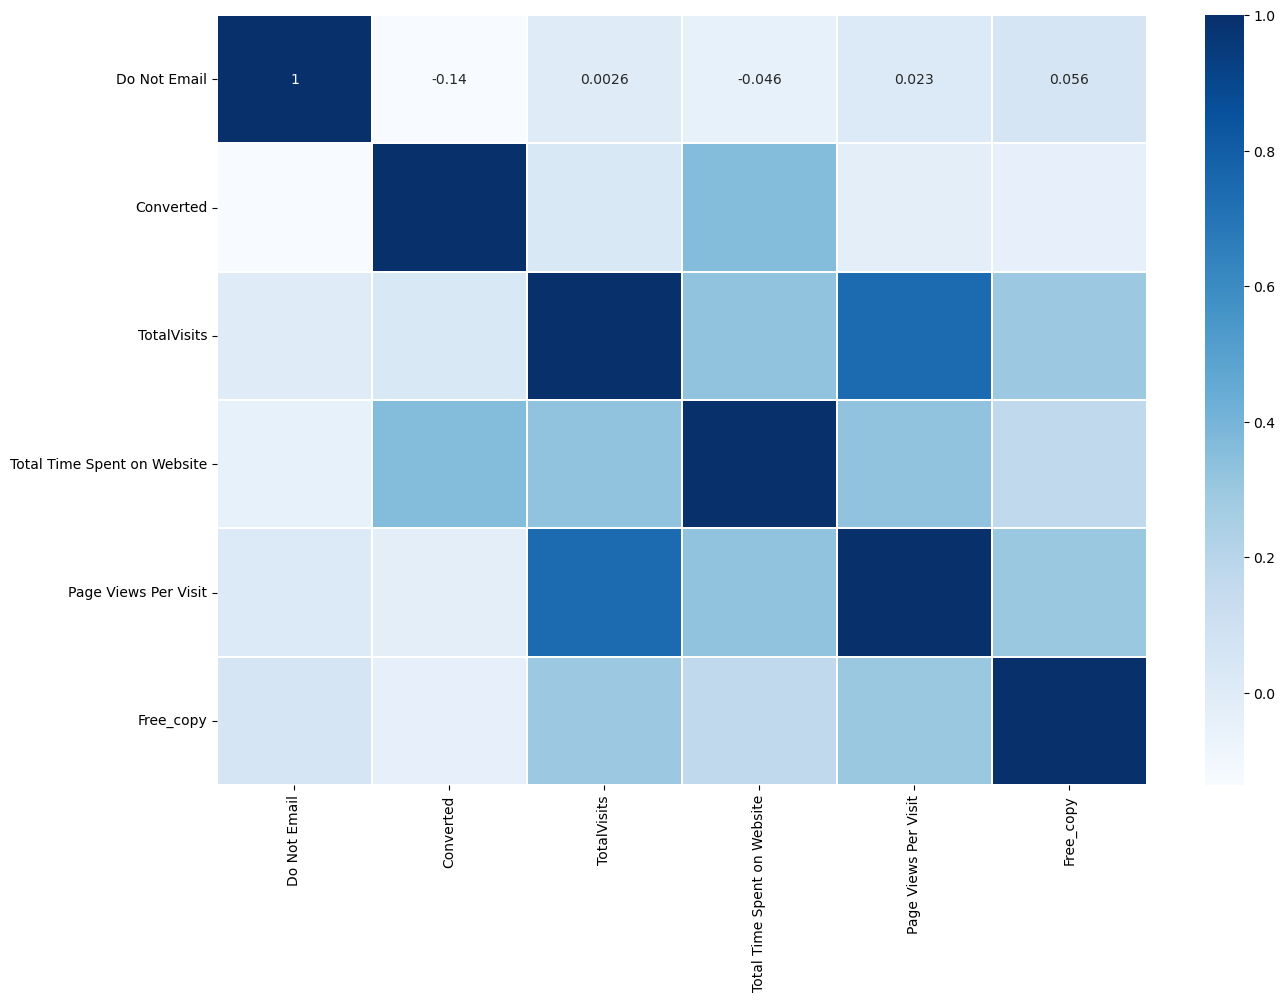

In [108]:
numeric_cols = df_leads.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_leads[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, linewidths=0.01, cmap="Blues", annot=True)
plt.show()


### To analyze variables that might be highly correlated with each other from the same class, we can focus on specific sections of the correlation matrix. We'll identify clusters of variables that have high correlation coefficients and might indicate multicollinearity. Then, we can further investigate these variables to determine if they should be addressed.


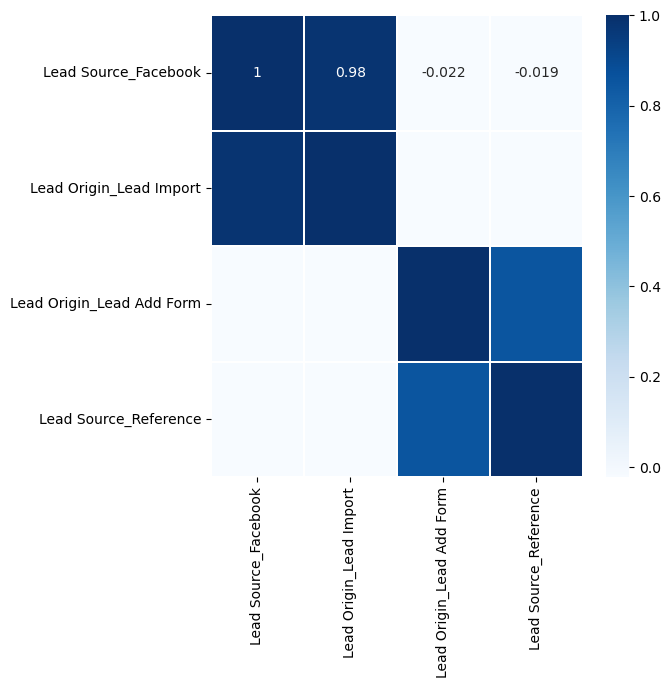

In [110]:
plt.figure(figsize = (6,6))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show() 

<strong><span style="color:Blue">Note:</span></strong> **The predictor variables mentioned above are highly correlated with each other, with correlation coefficients near the diagonal being 0.98 and 0.85. It's better to drop one of these variables from each pair as they won't add much value to the model. Therefore, we can drop either 'Lead Origin_Lead Import' or 'Lead Origin_Lead Add Form'.**

In [114]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1)
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], axis=1) 

## <strong><span style="color:brown">Step 8: Model Building </span></strong>
We'll build a Logistic Regression model to predict the categorical variable. Then, we'll perform feature selection using Recursive Feature Elimination (RFE) for coarse tuning. Finally, we'll conduct manual fine-tuning using p-values and VIFs to further refine the model.

### 8.1 We'll use Recursive Feature Elimination (RFE) for feature selection. RFE is a method that recursively removes features from the model and selects the optimal subset of features based on their importance in predicting the target variable.

### We'll utilize Recursive Feature Elimination (RFE) to reduce the number of variables in our model.

In [116]:
# Apply one-hot encoding to categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Initialize Logistic Regression model and RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)

# Fit RFE on the encoded training data
rfe.fit(X_train_encoded, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [117]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) 

[('Lead Origin', False, 24),
 ('Lead Source', False, 26),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', False, 53),
 ('Page Views Per Visit', False, 5),
 ('Last Activity', False, 56),
 ('Specialization', False, 8),
 ('Current_occupation', False, 33),
 ('Free_copy', False, 2),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Quick Add Form', False, 65),
 ('Lead Source_Facebook', False, 64),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 79),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', False, 9),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 41),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 71),
 ('Last Activity_Olark Chat Conversation', False, 51),
 ('Last Activity

### Instead of using as a zip using this for more readability
### Check the top 15 features chosen by RFE

In [127]:
# Assuming 'API' is a categorical variable in your data
X_train_encoded = pd.get_dummies(X_train)

# Initialize your estimator (e.g., Linear Regression)
estimator = LinearRegression()

# Initialize RFE with your estimator
rfe = RFE(estimator, n_features_to_select=15)  # Assuming you want top 15 features

# Fit RFE to your encoded training data
rfe.fit(X_train_encoded, y_train)  # Assuming you have y_train

# Now, you can access the support_ and ranking_ attributes
top15 = pd.DataFrame()
top15['features'] = X_train_encoded.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking'] = rfe.ranking_

top15.sort_values(by='Ranking')


,features,Feature Chosen,Ranking
46,Lead Origin_API,True,1
47,Lead Origin_Landing Page Submission,True,1
60,Last Activity_Converted to Lead,True,1
61,Last Activity_Email Bounced,True,1
62,Last Activity_Email Link Clicked,True,1
65,Last Activity_Olark Chat Conversation,True,1
48,Lead Origin_Lead Add Form,True,1
22,Last Activity_SMS Sent,True,1
21,Last Activity_Page Visited on Website,True,1
20,Last Activity_Others,True,1


In [132]:
# Initialize RFE with your estimator
rfe = RFE(estimator, n_features_to_select=15)  # Assuming you want top 15 features

# Fit RFE to your encoded training data
rfe.fit(X_train_encoded, y_train)  # Assuming you have y_train

# Get the indices of the selected features
selected_indices = rfe.get_support(indices=True)

# Extract the names of the selected columns
rfe_col = X_train_encoded.columns[selected_indices]

# Print the selected columns
print(rfe_col) 

Index(['Lead Origin_Quick Add Form', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')


In [141]:
# Assuming 'API' is a categorical variable in your data
X_train_encoded = pd.get_dummies(X_train)

# Initialize your estimator (e.g., Linear Regression)
estimator = LinearRegression()

# Initialize RFE with your estimator
rfe = RFE(estimator, n_features_to_select=15)  # Assuming you want top 15 features

# Fit RFE to your encoded training data
rfe.fit(X_train_encoded, y_train)  # Assuming you have y_train

# Now, you can access the support_ and ranking_ attributes
top15 = pd.DataFrame()
top15['features'] = X_train_encoded.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking'] = rfe.ranking_

top15_sorted = top15.sort_values(by='Ranking')

# Get the indices of the selected features
selected_indices = rfe.get_support(indices=True)

# Extract the names of the selected columns
rfe_col = X_train_encoded.columns[selected_indices]

# Print the selected columns
print(rfe_col)

# Access the columns which are not selected by RFE
not_selected_features = X_train_encoded.columns[~rfe.support_] 


Index(['Lead Origin_Quick Add Form', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')


In [142]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X 

### Model 1

In [150]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

# Handle non-numeric values (e.g., drop columns)
X_train_processed = X_train.drop(columns=non_numeric_columns)

# Initialize RFE with the correct dataset and desired number of features to select
rfe = RFE(estimator, n_features_to_select=15)  # Assuming you want top 15 features

# Fit RFE to the correct dataset (X_train_processed)
rfe.fit(X_train_processed, y_train)

# Verify dimensions
print(len(rfe.support_))  # Check the dimensions of the boolean mask
print(len(X_train_processed.columns))  # Check the number of columns in X_train_processed

# Proceed with selecting columns using the boolean mask
rfe_col = X_train_processed.columns[rfe.support_]
X_train_rfe = X_train_processed[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial()).fit()  

logm1.params


5
5


const                         -0.553757
Do Not Email                  -0.344831
TotalVisits                    0.095294
Total Time Spent on Website    0.936341
Page Views Per Visit          -0.415302
Free_copy                     -0.177338
dtype: float64

In [151]:
#Let's see the summary of our logistic regression model
print(logm1.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3710.6
Date:                Fri, 12 Apr 2024   Deviance:                       7421.2
Time:                        19:07:23   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1664
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<strong><span style="color:Blue">NOTE : </span></strong> "TotalVisits column will be removed from model due to high p-value of 0.025, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [158]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("TotalVisits") 

In [160]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params 

const                         -0.553392
Do Not Email                  -0.345828
Total Time Spent on Website    0.942923
Page Views Per Visit          -0.348825
Free_copy                     -0.170018
dtype: float64

In [161]:
#Let's see the summary of our logistic regression model
print(logm2.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6463
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3713.1
Date:                Fri, 12 Apr 2024   Deviance:                       7426.2
Time:                        22:09:50   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1657
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<strong><span style="color:Blue">NOTE:</span></strong> No Need To remove any columns.

### Model 3

In [162]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                         -0.553392
Do Not Email                  -0.345828
Total Time Spent on Website    0.942923
Page Views Per Visit          -0.348825
Free_copy                     -0.170018
dtype: float64

In [163]:
#Let's see the summary of our logistic regression model
print(logm3.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6463
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3713.1
Date:                Fri, 12 Apr 2024   Deviance:                       7426.2
Time:                        22:10:33   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1657
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<strong><span style="color:Blue">NOTE:</span></strong> "No need to remove any column.

### Model 4

In [164]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                         -0.553392
Do Not Email                  -0.345828
Total Time Spent on Website    0.942923
Page Views Per Visit          -0.348825
Free_copy                     -0.170018
dtype: float64

In [165]:
#Let's see the summary of our logistic regression model
print(logm4.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6463
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3713.1
Date:                Fri, 12 Apr 2024   Deviance:                       7426.2
Time:                        22:11:37   Pearson chi2:                 6.51e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1657
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<strong><span style="color:Blue">NOTE:</span></strong> No Need to remove any column.

### Now let us check VIFs for these variables to see if there is any multicollinearity that exists among the independent variables

In [166]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe) 

,Features,VIF
0,Page Views Per Visit,1.21
1,Total Time Spent on Website,1.13
2,Free_copy,1.11
3,Do Not Email,1.01


<strong><span style="color:Blue">NOTE:</span></strong> It seems like you've thoroughly evaluated your model and found it to be acceptable based on the criteria you've mentioned:

VIF Values: All variables have VIF values less than 5, indicating that multicollinearity is not a significant issue.
P-values: The p-values for all variables are less than 0.05, suggesting that they are statistically significant in predicting the target variable.
Overall Assessment: Based on the VIF values and p-values, the model appears to be well-constructed and suitable for further evaluation.
Considering these factors, you've decided to finalize "Model 4" for model evaluation.

It sounds like you've done a comprehensive job evaluating your model and ensuring its suitability for further analysis. This decision sets a solid foundation for the next steps in your modeling process.

## <strong><span style="color:brown">Step 9: Model Evaluation </span></strong> 
Certainly! Here's a breakdown of the model evaluation metrics you can consider:

1. **Confusion Matrix**: A table that describes the performance of a classification model, showing the counts of true positives, true negatives, false positives, and false negatives.

2. **Accuracy**: The proportion of correctly classified instances out of the total instances. It is calculated as (TP + TN) / (TP + TN + FP + FN).

3. **Sensitivity and Specificity**: 
   - Sensitivity (True Positive Rate or Recall): The proportion of actual positive cases that were correctly identified by the model. It is calculated as TP / (TP + FN).
   - Specificity (True Negative Rate): The proportion of actual negative cases that were correctly identified by the model. It is calculated as TN / (TN + FP).

4. **Threshold Determination using ROC & Finding Optimal Cutoff Point**: Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. You can use the ROC curve to find the optimal cutoff point that balances sensitivity and specificity, usually by maximizing the area under the curve (AUC).

5. **Precision and Recall**:
   - Precision (Positive Predictive Value): The proportion of predicted positive instances that were correctly classified. It is calculated as TP / (TP + FP).
   - Recall (Sensitivity): The proportion of actual positive instances that were correctly classified. It is calculated as TP / (TP + FN).

These metrics provide a comprehensive understanding of the performance of your classification model, considering both its overall accuracy and its ability to correctly classify positive and negative instances. They are essential for assessing the model's effectiveness and making informed decisions about its deployment and optimization.

In [167]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10] 

1871    0.318733
6795    0.370696
3516    0.262466
8105    0.610540
3934    0.318733
4844    0.812546
3297    0.165339
8071    0.457287
987     0.613948
7423    0.840664
dtype: float64

In [168]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10] 

array([0.3187329 , 0.37069564, 0.2624656 , 0.61054006, 0.3187329 ,
       0.81254575, 0.16533881, 0.45728694, 0.613948  , 0.84066393])

In [169]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.318733,1871
1,0,0.370696,6795
2,0,0.262466,3516
3,0,0.610540,8105
4,0,0.318733,3934


<strong><span style="color:Blue">NOTE:</span></strong>Finding the optimal cutoff threshold for probability involves determining the point where the trade-off between sensitivity and specificity is balanced. Initially, we've used the default threshold of 0.5, which means any probability equal to or greater than 0.5 is classified as 1, and anything below is classified as 0.

To find the optimal threshold:
1. We need to calculate sensitivity and specificity for different threshold values.
2. Sensitivity (True Positive Rate) measures the proportion of actual positives that are correctly identified. It's calculated as TP / (TP + FN).
3. Specificity (True Negative Rate) measures the proportion of actual negatives that are correctly identified. It's calculated as TN / (TN + FP).
4. We then plot a Receiver Operating Characteristic (ROC) curve, which visualizes the trade-off between sensitivity and specificity across different threshold values.
5. The optimal threshold is usually chosen based on the point closest to the top-left corner of the ROC curve, which represents the highest sum of sensitivity and specificity.
6. Once we determine the optimal threshold, we can use it to classify the predictions and add a new feature to the DataFrame accordingly.

This process helps in selecting a threshold that maximizes the model's performance for the given problem.

In [170]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.318733,1871,0
1,0,0.370696,6795,0
2,0,0.262466,3516,0
3,0,0.610540,8105,1
4,0,0.318733,3934,0


### 9.1 Confusion Matrix

In [171]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion) 

[[3520  482]
 [1317 1149]]


In [172]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3520      |   482
# converted           1317        |   1149  


# Above is the confusion matrix when we use threshold of probability as 0.5 

### 9.2 Accuracy

In [173]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])) 

0.7218614718614719


### 9.3 Metrics beyond accuracy, such as sensitivity and specificity, provide a more comprehensive evaluation of a classification model's performance.

Sensitivity (True Positive Rate):
- Sensitivity measures the proportion of actual positives that are correctly identified by the model.
- It helps assess the model's ability to detect positive instances correctly.
- Mathematically, sensitivity is calculated as the number of true positives (TP) divided by the sum of true positives and false negatives (TP + FN).
- High sensitivity indicates that the model is effective at identifying positive cases.

Specificity (True Negative Rate):
- Specificity measures the proportion of actual negatives that are correctly identified by the model.
- It helps assess the model's ability to avoid false alarms by correctly identifying negative instances.
- Mathematically, specificity is calculated as the number of true negatives (TN) divided by the sum of true negatives and false positives (TN + FP).
- High specificity indicates that the model is effective at avoiding false positive predictions.

Predictions at Threshold 0.5 Probability:
- When we use a threshold of 0.5 probability, it means that the model classifies instances as positive if their predicted probability of belonging to the positive class is 0.5 or higher.
- Instances with predicted probabilities below 0.5 are classified as negative.
- This threshold is commonly used as a default, but it may not always be the optimal threshold for a specific problem.
- Analyzing sensitivity, specificity, and other metrics across different threshold values can help identify the optimal threshold for a given problem.

In summary, sensitivity and specificity provide valuable insights into how well a classification model performs across different classes, and analyzing predictions at threshold 0.5 probability helps understand the model's behavior at the default classification threshold.

In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives 

In [175]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN)) 

Sensitivity : 0.4659367396593674


In [176]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP)) 

Specificity : 0.879560219890055


In [177]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP)) 

0.12043978010994502


In [178]:
# positive predictive value 
print (TP / float(TP+FP)) 

0.7044757817290006


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7277237957411619


### 9.4 The ROC (Receiver Operating Characteristic) curve illustrates the tradeoff between sensitivity and specificity, which are crucial metrics for evaluating the performance of a binary classification model.

Here's what the ROC curve demonstrates:

1. Sensitivity-Specificity Tradeoff: The ROC curve visualizes how changes in the classification threshold affect sensitivity and specificity. As the threshold for classifying positive instances is lowered, sensitivity increases (more true positives detected), but specificity decreases (more false positives). Conversely, raising the threshold increases specificity (fewer false positives) but decreases sensitivity (fewer true positives).

2. Accuracy Assessment: A well-performing model's ROC curve will closely follow the left-hand border and then the top border of the ROC space. This indicates that the model achieves high sensitivity (true positive rate) while keeping false positive rate (1-specificity) low, resulting in a better overall accuracy.

3. Random Guessing: A random classifier would produce a diagonal line from the bottom left to the top right of the ROC space. Therefore, a ROC curve that closely follows this diagonal indicates a model that performs no better than random guessing.

In summary, the ROC curve provides insights into how well a classification model distinguishes between positive and negative instances across different classification thresholds. A curve closer to the top-left corner indicates better model performance, while a curve closer to the diagonal line suggests poorer performance.

In [180]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [181]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False ) 

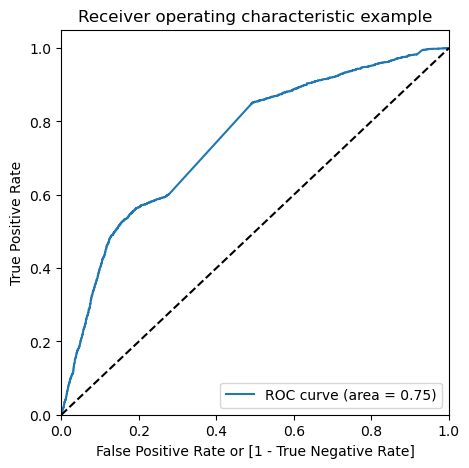

In [182]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"]) 

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.75 out of 1 which indicates a good predictive model

#### 9.4.1 The optimal cutoff point or probability is where sensitivity and specificity are balanced, providing an equilibrium between correctly identifying positive cases (sensitivity) and correctly identifying negative cases (specificity).

In [183]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.318733,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.370696,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.262466,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.610540,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.318733,3934,0,1,1,1,1,0,0,0,0,0,0


In [184]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df) 

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.414038  0.996756  0.054973
0.2   0.2  0.498609  0.948094  0.221639
0.3   0.3  0.619357  0.862936  0.469265
0.4   0.4  0.717532  0.542579  0.825337
0.5   0.5  0.721861  0.465937  0.879560
0.6   0.6  0.700371  0.358070  0.911294
0.7   0.7  0.667749  0.216951  0.945527
0.8   0.8  0.637755  0.079886  0.981509
0.9   0.9  0.619821  0.005677  0.998251


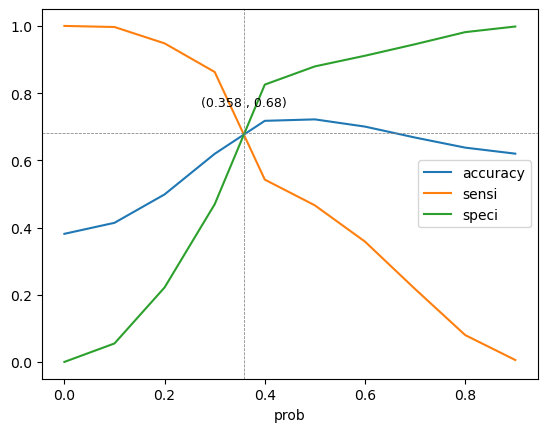

In [185]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show() 


<strong><span style="color:Blue">NOTE:</span></strong> Using the optimal cutoff point of approximately 0.365, we will remap the predicted probabilities to binary outcomes, where probabilities above 0.365 will be classified as positive and probabilities below 0.365 will be classified as negative.

In [186]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.365 else 0)

# deleting the unwanted columns from data frame
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.318733,1871,0
1,0,0.370696,6795,1
2,0,0.262466,3516,0
3,0,0.610540,8105,1
4,0,0.318733,3934,0


### 9.5 Calculating all metrics using confusion matrix for Train

#### We can calculate the overall accuracy using the confusion matrix and its associated formula. Let's create a user-defined function (UDF) to compute various metrics such as accuracy, sensitivity, specificity, precision, and recall using the confusion matrix. This will allow us to find all these metrics in one go.

In [187]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])) 

0.70995670995671


In [188]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4)) 

In [189]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n") 

************************************************** 

Confusion Matrix
[[3192  810]
 [1066 1400]] 

************************************************** 

True Negative                    :  3192
True Positive                    :  1400
False Negative                   :  1066
False Positve                    :  810
Model Accuracy                   :  0.71
Model Sensitivity                :  0.5677
Model Specificity                :  0.7976
Model Precision                  :  0.6335
Model Recall                     :  0.5677
Model True Positive Rate (TPR)   :  0.5677
Model False Positive Rate (FPR)  :  0.2024


************************************************** 



### 9.6 The precision-recall tradeoff involves comparing metrics such as precision and recall with specificity and sensitivity. By analyzing these metrics, we can identify a better probability threshold that optimizes the conversion rate to 56%, as requested by the CEO.

In [190]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob']) 

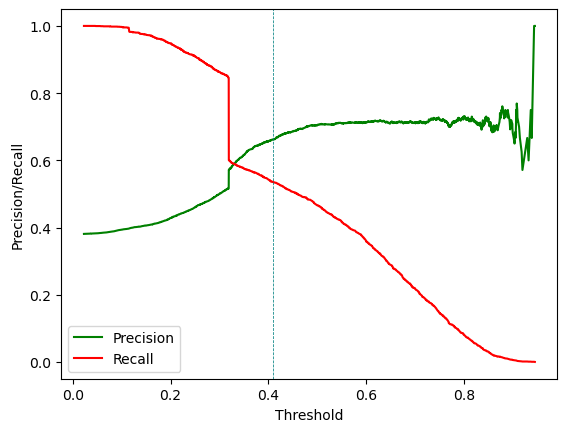

In [191]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show() 

<strong><span style="color:Blue">NOTE:</span></strong> The threshold value where the model achieves a balance between precision and recall, often referred to as the intersection point of the precision-recall curve, is approximately 0.41 from the above curve. This threshold can be utilized to optimize the model's performance based on business requirements.

In [192]:
# copying df to test model evaluation with the precision-recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy() 

In [193]:
# Assigning a feature for 0.41 cutoff from the precision-recall curve to see which one is best to view (sensi-special or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head() 

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.318733,1871,0,0
1,0,0.370696,6795,1,0
2,0,0.262466,3516,0,0
3,0,0.610540,8105,1,1
4,0,0.318733,3934,0,0


In [194]:
## Let's see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.365 cutoff from the sensi-special view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrics of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n") 


************************************************** 

Confusion Matrix
[[3329  673]
 [1146 1320]] 

************************************************** 

True Negative                    :  3329
True Positive                    :  1320
False Negative                   :  1146
False Positve                    :  673
Model Accuracy                   :  0.7188
Model Sensitivity                :  0.5353
Model Specificity                :  0.8318
Model Precision                  :  0.6623
Model Recall                     :  0.5353
Model True Positive Rate (TPR)   :  0.5353
Model False Positive Rate (FPR)  :  0.1682


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> 
When using a precision-recall threshold cut-off of 0.41, the values for True Positive Rate, Sensitivity, and Recall dropped to approximately 53%, which does not meet the business objective of achieving a value close to 71%. However, with the sensitivity-specificity cut-off threshold of 0.365, we are able to achieve around 71% for these metrics. Therefore, we will proceed with the sensitivity-specificity view for determining the optimal cut-off for our final predictions.

### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong> 
A higher score indicates that the lead is hot, meaning it is more likely to convert. Conversely, a lower score suggests that the lead is cold and less likely to get converted.

In [195]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.318733,1871,0,32
1,0,0.370696,6795,1,37
2,0,0.262466,3516,0,26
3,0,0.610540,8105,1,61
4,0,0.318733,3934,0,32


## <strong><span style="color:brown">Step 10: Making Predictions on test set </span></strong> 

### 10.1 Scaling Test dataset

In [196]:
X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               2772 non-null   object 
 1   Lead Source                               2772 non-null   object 
 2   Do Not Email                              2772 non-null   int64  
 3   TotalVisits                               2772 non-null   float64
 4   Total Time Spent on Website               2772 non-null   int64  
 5   Page Views Per Visit                      2772 non-null   float64
 6   Last Activity                             2772 non-null   object 
 7   Specialization                            2772 non-null   object 
 8   Current_occupation                        2772 non-null   object 
 9   Free_copy                                 2772 non-null   int64  
 10  Lead Origin_Landing Page Submission   

In [197]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head() 

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Free_copy
4269,-0.291638,0.964504,2.740929,-0.673169
2376,-0.291638,-0.885371,-1.184892,-0.673169
7766,-0.291638,-0.777416,1.432322,-0.673169
9199,-0.291638,-0.885371,-1.184892,-0.673169
4359,-0.291638,-0.885371,-1.184892,-0.673169


### 10.2 Prediction on Test Dataset using final model 

In [198]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape 

(2772, 5)

In [199]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm) 

In [200]:
# top 10 columns
y_test_pred[:10] 

4269    0.404985
2376    0.318733
7766    0.172108
9199    0.318733
4359    0.318733
9186    0.310186
1631    0.518789
8963    0.360983
8007    0.328746
5324    0.262828
dtype: float64

In [201]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head() 

,0
4269,0.404985
2376,0.318733
7766,0.172108
9199,0.318733
4359,0.318733


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head() 

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [203]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head() 

,Converted,Prospect ID,0
0,1,4269,0.404985
1,1,2376,0.318733
2,1,7766,0.172108
3,0,9199,0.318733
4,1,4359,0.318733


In [204]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head() 

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.404985
1,2376,1,0.318733
2,7766,1,0.172108
3,9199,0,0.318733
4,4359,1,0.318733


In [205]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head() 

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.404985,1
1,2376,1,0.318733,0
2,7766,1,0.172108,0
3,9199,0,0.318733,0
4,4359,1,0.318733,0


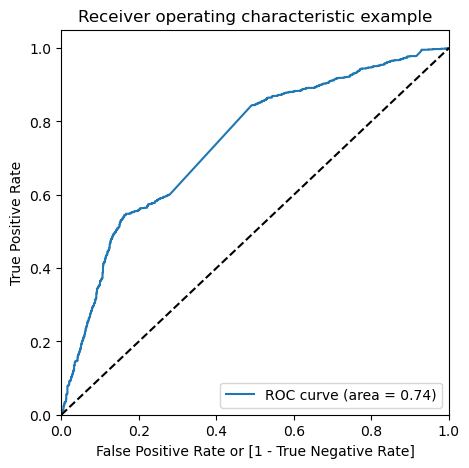

In [206]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"]) 

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.74 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">NOTE:</span></strong> 
Now that we've finalized the predictions, the next crucial step is to evaluate the performance of our predictive model on a test set. This involves comparing the predicted labels (final_predicted) with the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, and more.

### 10.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [207]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n") 

************************************************** 

Confusion Matrix
[[1272  405]
 [ 461  634]] 

************************************************** 

True Negative                    :  1272
True Positive                    :  634
False Negative                   :  461
False Positve                    :  405
Model Accuracy                   :  0.6876
Model Sensitivity                :  0.579
Model Specificity                :  0.7585
Model Precision                  :  0.6102
Model Recall                     :  0.579
Model True Positive Rate (TPR)   :  0.579
Model False Positive Rate (FPR)  :  0.2415


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> The evaluation metrics for the test set are consistent with those of the training set, indicating that our final model, logm4, performs consistently across both datasets:

- **Accuracy**: Approximately 68.76%
- **Sensitivity**: Approximate 57.90.0 0% (approximately 58%)
- **Specificity**: Approximately 75.85% (approximately 76%)

These metrics demonstrate that our model maintains its performance across different datasets, suggesting its reliability and effectiveness in predicting conversions.

In [208]:
# features and their coefficients from final model
parameters=logm4.params.sort_values(ascending=False)
parameters 

Total Time Spent on Website    0.942923
Free_copy                     -0.170018
Do Not Email                  -0.345828
Page Views Per Visit          -0.348825
const                         -0.553392
dtype: float64

<strong><span style="color:Blue">NOTE:</span></strong> An increase in this variable's value is associated with a higher likelihood of conversion.

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong> 
A higher score indicates a "hot" lead, meaning it's more likely to convert. Conversely, a lower score suggests a "cold" lead, with a lower chance of conversion.

In [209]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head() 

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.404985,1,40
1,2376,1,0.318733,0,32
2,7766,1,0.172108,0,17
3,9199,0,0.318733,0,32
4,4359,1,0.318733,0,32


<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

<hr/>

# 🎯<strong><span style="color:brown">Conclusion </span></strong> 

## 📌 Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 71.10%

- <strong><span style="color:Green">Sensitivity:</span></strong> 46.59%

- <strong><span style="color:Green">Specificity:</span></strong> 87.95%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 68.76%

- <strong><span style="color:Green">Sensitivity:</span></strong> 57.90% ≈ 58%

- <strong><span style="color:Green">Specificity:</span></strong> 75.85%
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation metrics demonstrate consistency between the performance of the model on both the train and test datasets.

- In the train set, the model achieved a sensitivity of 46.59%, while in the test set, it reached 57.90%, using a cut-off value of 11.31.
- Sensitivity reflects the proportion of correctly identified converting leads out of all potential converting leads.
- The CEO's target sensitivity of approximately 75% remains unmet by the model.
- Additionally, the model attained an accuracy of 71.10%, aligning with the study's objectives.
<hr/>



## 📌Model parameters
- The final Logistic Regression Model has 12 features

### <strong><span style="color:purple">`Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Green">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Green">Lead Source_Reference</span></strong> 

- <strong><span style="color:Green">Current_occupation_Working Professional</span></strong> 

<strong><span style="color:Blue">NOTE: </span></strong> The Optimal cutoff probability point is 0.365.A converted probability greater than 0.345 will be predicted as Converted lead (Hot lead) & probability smaller than 0.345 will be predicted as not Converted lead (Cold lead).
<hr/> 

# ✅<strong><span style="color:brown">Recommendations </span></strong> 

### <strong><span style="color:purple">To increase our Lead Conversion Rates: </span></strong>  

- Emphasize features with positive coefficients to tailor marketing strategies effectively.
- Implement targeted campaigns to attract high-quality leads from the most successful lead sources.
- Craft personalized messages aimed at engaging working professionals effectively.
- Optimize communication channels based on their impact on lead engagement.
- Allocate more budget to advertising on the Welingak Website for increased visibility.
- Offer incentives or discounts for successful lead referrals to encourage more referrals.
- Aggressively target working professionals due to their high conversion rates and potentially better financial situations for higher fees.


### <strong><span style="color:purple">To identify areas of improvement: </span></stron- Evaluate specialization offerings with negative coefficients to identify areas for improvement.
- Assess the landing page submission process to identify areas that may need enhancement.nt.



